In [9]:
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report

In [10]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Printing the iris data_set.

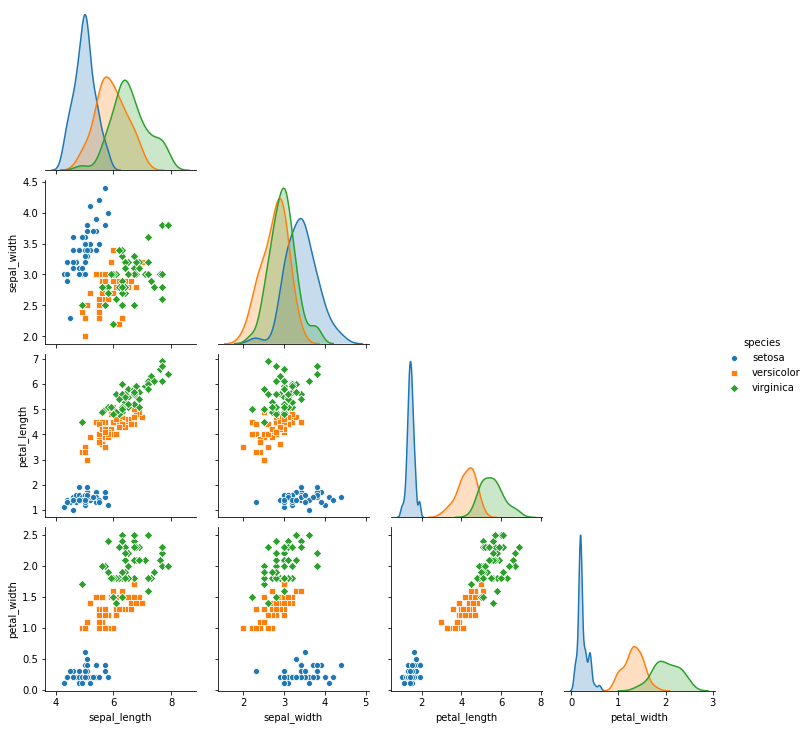

In [11]:
sns.pairplot(hue="species",markers=["o","s","D"],corner=True,data=iris)

Plotting a pairwise seaborn univariant and bivariant graphs to visualize the relationship between the feature and there classification of the species.
Furthermore, we can see , feature set [Petal_width] , [Petal_width,Petal_length] , [Petal_length,Sepal_length] , [Petal_length,Sepal_width] and [Petal_length] could be good to train our model upon since they seperate the species quiet good.

We will be using [Petal_length,Petal_width] because it more discrete in dividing the classes.

In [12]:
iris.drop(['sepal_width','sepal_length'], axis=1, inplace=True)
train_x,test_x,y_train,y_test = train_test_split(iris.iloc[:,:-1],iris.iloc[:,-1],test_size=0.30)
print(train_x.shape)
print(y_train.shape)


(105, 2)
(105,)


<h1> Support Vector Classifier </h1>

In [13]:
model = svm.SVC()
model.fit(train_x,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
pred = model.predict(test_x)
print(pred)
print(model.score(test_x,y_test))


['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'virginica' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa']
0.9777777777777777


<h1> XGbooster </h1>

In [15]:
model = xgb.XGBClassifier()
model.fit(train_x,y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [16]:
pred = model.predict(test_x)
print(pred)
print(classification_report(pred,y_test))

['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'virginica' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa']
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.97      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

